In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train_with_labels.csv')

In [3]:
train

,create_dt,mdm_object_name,mdm_model_id,lon,lat,alt,speed_gps,direction,accel_forward_nn,accel_braking_nn,accel_angular_nn,accel_vertical_nn,format,label
0,2023-09-26 08:00:12,119,61,0.007798,0.001680,-90,0.0,19.1,0.0,0.0,0.0,0.0,datetime,4
1,2023-09-26 08:00:17,119,61,0.007798,0.001680,-90,0.0,19.1,0.0,0.0,0.0,0.0,datetime,0
2,2023-09-26 08:00:22,119,61,0.007798,0.001680,-90,0.0,19.1,0.0,0.0,0.0,0.0,datetime,0
3,2023-09-26 08:00:27,119,61,0.007798,0.001680,-90,0.0,19.1,0.0,0.0,0.0,0.0,datetime,0
4,2023-09-26 08:00:32,119,61,0.007798,0.001680,-90,0.0,19.1,0.0,0.0,0.0,0.0,datetime,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516065,2023-09-30 07:27:38,1498,62,-0.009170,0.014315,72,0.0,326.0,0.0,0.0,0.0,0.0,datetime,4
516066,2023-09-30 07:27:43,1498,62,-0.009170,0.014315,72,0.0,326.0,0.0,0.0,0.0,0.0,datetime,4
516067,2023-09-30 07:27:48,1498,62,-0.009170,0.014315,72,0.0,326.0,0.0,0.0,0.0,0.0,datetime,4
516068,2023-09-30 07:27:53,1498,62,-0.009170,0.014315,72,0.0,326.0,0.0,0.0,0.0,0.0,datetime,4


In [4]:
# check label values
train['label'] = train['label'].astype('str')

In [5]:
train['label'].value_counts()

label
2    235251
5    162839
0     69216
1     30780
4     12968
3      5016
Name: count, dtype: int64

In [6]:
train['create_dt'] = pd.to_datetime(train['create_dt'])

In [7]:
train.dtypes

create_dt            datetime64[ns]
mdm_object_name               int64
mdm_model_id                  int64
lon                         float64
lat                         float64
alt                           int64
speed_gps                   float64
direction                   float64
accel_forward_nn            float64
accel_braking_nn            float64
accel_angular_nn            float64
accel_vertical_nn           float64
format                       object
label                        object
dtype: object

In [8]:
df = train.copy()

In [9]:
df['label'] = df['label'].astype('int')

In [10]:
df = df.drop(columns=['format'])

In [11]:
df

,create_dt,mdm_object_name,mdm_model_id,lon,lat,alt,speed_gps,direction,accel_forward_nn,accel_braking_nn,accel_angular_nn,accel_vertical_nn,label
0,2023-09-26 08:00:12,119,61,0.007798,0.001680,-90,0.0,19.1,0.0,0.0,0.0,0.0,4
1,2023-09-26 08:00:17,119,61,0.007798,0.001680,-90,0.0,19.1,0.0,0.0,0.0,0.0,0
2,2023-09-26 08:00:22,119,61,0.007798,0.001680,-90,0.0,19.1,0.0,0.0,0.0,0.0,0
3,2023-09-26 08:00:27,119,61,0.007798,0.001680,-90,0.0,19.1,0.0,0.0,0.0,0.0,0
4,2023-09-26 08:00:32,119,61,0.007798,0.001680,-90,0.0,19.1,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
516065,2023-09-30 07:27:38,1498,62,-0.009170,0.014315,72,0.0,326.0,0.0,0.0,0.0,0.0,4
516066,2023-09-30 07:27:43,1498,62,-0.009170,0.014315,72,0.0,326.0,0.0,0.0,0.0,0.0,4
516067,2023-09-30 07:27:48,1498,62,-0.009170,0.014315,72,0.0,326.0,0.0,0.0,0.0,0.0,4
516068,2023-09-30 07:27:53,1498,62,-0.009170,0.014315,72,0.0,326.0,0.0,0.0,0.0,0.0,4


In [12]:
# transform create_dt to year, month, day, hour, minute, second
df['year'] = df['create_dt'].dt.year
df['month'] = df['create_dt'].dt.month
df['day'] = df['create_dt'].dt.day
df['hour'] = df['create_dt'].dt.hour
df['minute'] = df['create_dt'].dt.minute
df['second'] = df['create_dt'].dt.second
df['day_of_week'] = df['create_dt'].dt.dayofweek  # 0 = Monday, 6 = Sunday
df['week_of_year'] = df['create_dt'].dt.isocalendar().week  # ISO week number

# Cyclical encoding for hour (repeat every 24 hours)
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

# Cyclical encoding for day of the week (repeat every 7 days)
df['day_of_week_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
df['day_of_week_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)


In [13]:
df.dtypes

create_dt            datetime64[ns]
mdm_object_name               int64
mdm_model_id                  int64
lon                         float64
lat                         float64
alt                           int64
speed_gps                   float64
direction                   float64
accel_forward_nn            float64
accel_braking_nn            float64
accel_angular_nn            float64
accel_vertical_nn           float64
label                         int32
year                          int32
month                         int32
day                           int32
hour                          int32
minute                        int32
second                        int32
day_of_week                   int32
week_of_year                 UInt32
hour_sin                    float64
hour_cos                    float64
day_of_week_sin             float64
day_of_week_cos             float64
dtype: object

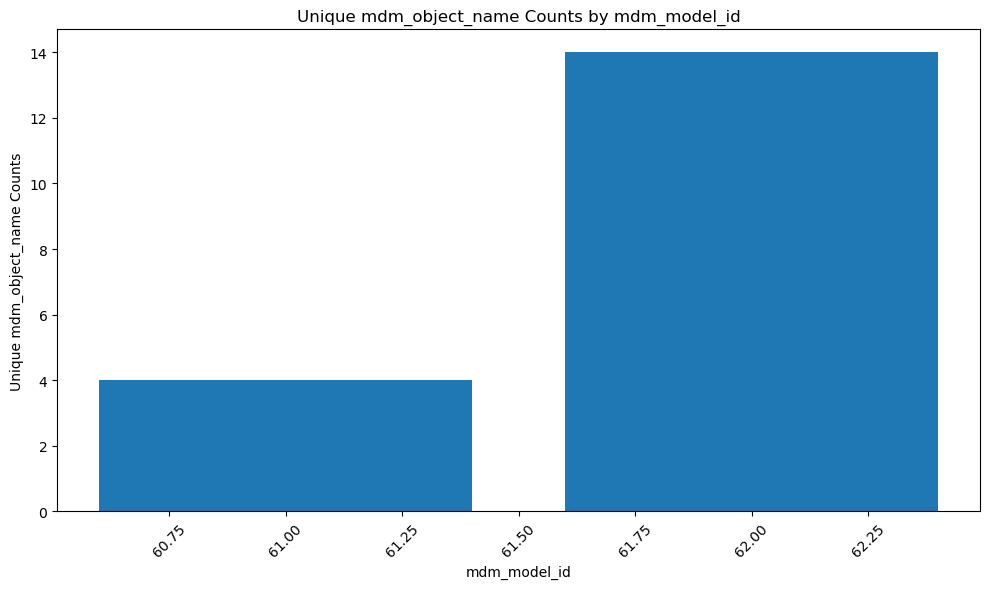

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Group by 'mdm_model_id' and aggregate unique 'mdm_object_name' values
grouped_df = df.groupby('mdm_model_id')['mdm_object_name'].nunique().reset_index(name='unique_counts')

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(grouped_df['mdm_model_id'], grouped_df['unique_counts'])

plt.xlabel('mdm_model_id')
plt.ylabel('Unique mdm_object_name Counts')
plt.title('Unique mdm_object_name Counts by mdm_model_id')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

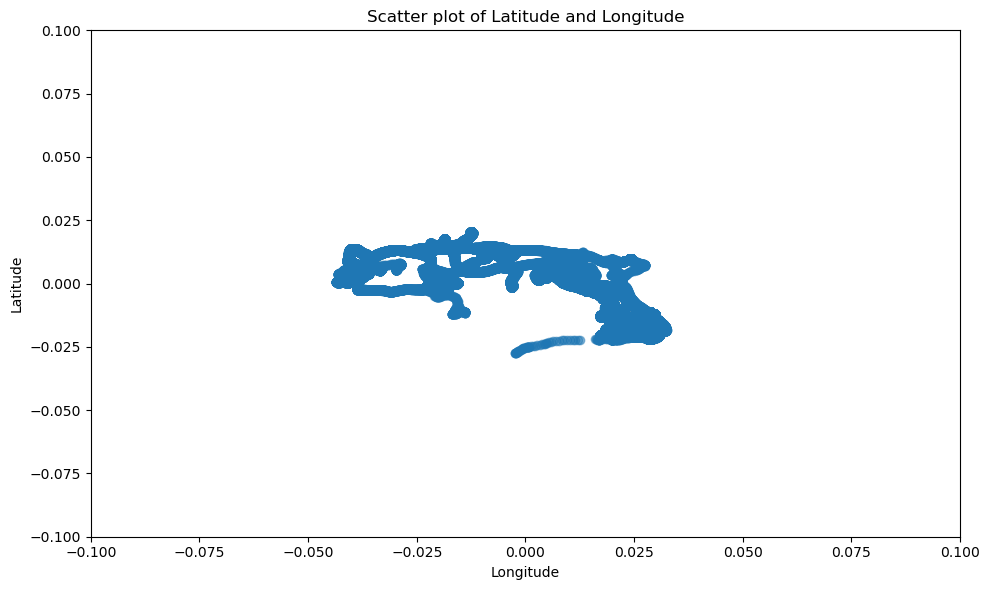

In [15]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'lon' and 'lat' columns
plt.figure(figsize=(10, 6))
plt.scatter(df['lon'], df['lat'], alpha=0.5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter plot of Latitude and Longitude')

# Set the scale for x and y axis
plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)

plt.tight_layout()
plt.show()

In [16]:
median_lat = df['lat'].median()
median_lon = df['lon'].median()

In [17]:
# Replace values greater than 0.1 or less than -0.1 with the median
df['lat'] = df['lat'].apply(lambda x: median_lat if x > 0.1 or x < -0.1 else x)
df['lon'] = df['lon'].apply(lambda x: median_lon if x > 0.1 or x < -0.1 else x)

In [18]:
df.dtypes

create_dt            datetime64[ns]
mdm_object_name               int64
mdm_model_id                  int64
lon                         float64
lat                         float64
alt                           int64
speed_gps                   float64
direction                   float64
accel_forward_nn            float64
accel_braking_nn            float64
accel_angular_nn            float64
accel_vertical_nn           float64
label                         int32
year                          int32
month                         int32
day                           int32
hour                          int32
minute                        int32
second                        int32
day_of_week                   int32
week_of_year                 UInt32
hour_sin                    float64
hour_cos                    float64
day_of_week_sin             float64
day_of_week_cos             float64
dtype: object

In [19]:
print(df.dtypes)
print(df.describe())

create_dt            datetime64[ns]
mdm_object_name               int64
mdm_model_id                  int64
lon                         float64
lat                         float64
alt                           int64
speed_gps                   float64
direction                   float64
accel_forward_nn            float64
accel_braking_nn            float64
accel_angular_nn            float64
accel_vertical_nn           float64
label                         int32
year                          int32
month                         int32
day                           int32
hour                          int32
minute                        int32
second                        int32
day_of_week                   int32
week_of_year                 UInt32
hour_sin                    float64
hour_cos                    float64
day_of_week_sin             float64
day_of_week_cos             float64
dtype: object
                           create_dt  mdm_object_name   mdm_model_id   
count         

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df_sorted = df.sort_values(by='create_dt').head(10000)

In [22]:
df 

,create_dt,mdm_object_name,mdm_model_id,lon,lat,alt,speed_gps,direction,accel_forward_nn,accel_braking_nn,...,day,hour,minute,second,day_of_week,week_of_year,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos
0,2023-09-26 08:00:12,119,61,0.007798,0.001680,-90,0.0,19.1,0.0,0.0,...,26,8,0,12,1,39,0.866025,-0.500000,0.781831,0.623490
1,2023-09-26 08:00:17,119,61,0.007798,0.001680,-90,0.0,19.1,0.0,0.0,...,26,8,0,17,1,39,0.866025,-0.500000,0.781831,0.623490
2,2023-09-26 08:00:22,119,61,0.007798,0.001680,-90,0.0,19.1,0.0,0.0,...,26,8,0,22,1,39,0.866025,-0.500000,0.781831,0.623490
3,2023-09-26 08:00:27,119,61,0.007798,0.001680,-90,0.0,19.1,0.0,0.0,...,26,8,0,27,1,39,0.866025,-0.500000,0.781831,0.623490
4,2023-09-26 08:00:32,119,61,0.007798,0.001680,-90,0.0,19.1,0.0,0.0,...,26,8,0,32,1,39,0.866025,-0.500000,0.781831,0.623490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516065,2023-09-30 07:27:38,1498,62,-0.009170,0.014315,72,0.0,326.0,0.0,0.0,...,30,7,27,38,5,39,0.965926,-0.258819,-0.974928,-0.222521
516066,2023-09-30 07:27:43,1498,62,-0.009170,0.014315,72,0.0,326.0,0.0,0.0,...,30,7,27,43,5,39,0.965926,-0.258819,-0.974928,-0.222521
516067,2023-09-30 07:27:48,1498,62,-0.009170,0.014315,72,0.0,326.0,0.0,0.0,...,30,7,27,48,5,39,0.965926,-0.258819,-0.974928,-0.222521
516068,2023-09-30 07:27:53,1498,62,-0.009170,0.014315,72,0.0,326.0,0.0,0.0,...,30,7,27,53,5,39,0.965926,-0.258819,-0.974928,-0.222521


In [23]:
# Separate features and target
X = df.drop(columns=['label', 'create_dt'])  # Assuming 'create_dt' is not needed as a feature
y = df['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a base model
rf = RandomForestClassifier(random_state=42)

# Instantiate the random search model
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                                   n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
random_search.fit(X_train_scaled, y_train)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

# Print the best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

# Print classification report
print(classification_report(y_test, y_pred))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Feature importance
feature_importance = best_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False).reset_index(drop=True)

# Plot feature importance
plt.figure(figsize=(12,8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20))
plt.title('Top 20 Feature Importance')
plt.tight_layout()
plt.show()

# Save the model
import joblib
joblib.dump(best_model, 'best_random_forest_model.joblib')

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [68]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

# Calculate F1 score and accuracy
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'macro' or 'micro' depending on your needs
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("F1 Score: ", f1)
print("Accuracy: ", accuracy)

# Print the classification report for detailed metrics
print(classification_report(y_test, y_pred))


F1 Score:  0.9979793154761905
Accuracy:  0.998
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       0.99      1.00      0.99       159
           2       1.00      1.00      1.00      1158
           3       1.00      0.91      0.95        22
           4       0.95      0.95      0.95        37
           5       1.00      1.00      1.00       496

    accuracy                           1.00      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Scale the F1 score to a 0-100 range
score = max(0, 100 * f1)

# Print the scaled score
print("Scaled F1 Score (0-100): ", score)

# Optionally, print other evaluation metrics
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))